In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
%cd /content/drive/MyDrive/Statistics with Python/Regression Analysis/Capstone Project_ Titanic Survivor Prediction

/content/drive/MyDrive/Statistics with Python/Regression Analysis/Capstone Project_ Titanic Survivor Prediction


In [ ]:
#Load the data ad see the table to know the data

df = pd.read_csv('titanic.csv')
df.head()


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
#Check the information such as data type to ensure is according to the needs
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


#Data analysis

In [ ]:
# i need to remove the "Name" variable due to is an object and do not add any relevant info about if the person can be safe or not.

# Remove the 'Name' column
df = df.drop(columns=['Name'])

# Verify the column has been removed
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [ ]:
# transform the Sex variable, an object to a binary variable
##transform the Pclass variable into a dummy variable

# Transform 'Sex' to a binary variable
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


# Transform 'Pclass' to dummy variables
pclass_dummies = pd.get_dummies(df['Pclass'], prefix='Pclass',drop_first=True)
df = pd.concat([df, pclass_dummies], axis=1)

# Convert True/False to 1/0 for Pclass dummy variables
df[['Pclass_2', 'Pclass_3']] = df[['Pclass_2', 'Pclass_3']].astype(int)

# Verify the transformations
df.head()


,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass_2,Pclass_3
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,0
4,0,3,0,35.0,0,0,8.0500,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Sex                      887 non-null    int64  
 3   Age                      887 non-null    float64
 4   Siblings/Spouses Aboard  887 non-null    int64  
 5   Parents/Children Aboard  887 non-null    int64  
 6   Fare                     887 non-null    float64
 7   Pclass_2                 887 non-null    int64  
 8   Pclass_3                 887 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.5 KB


#Correlation Analysis

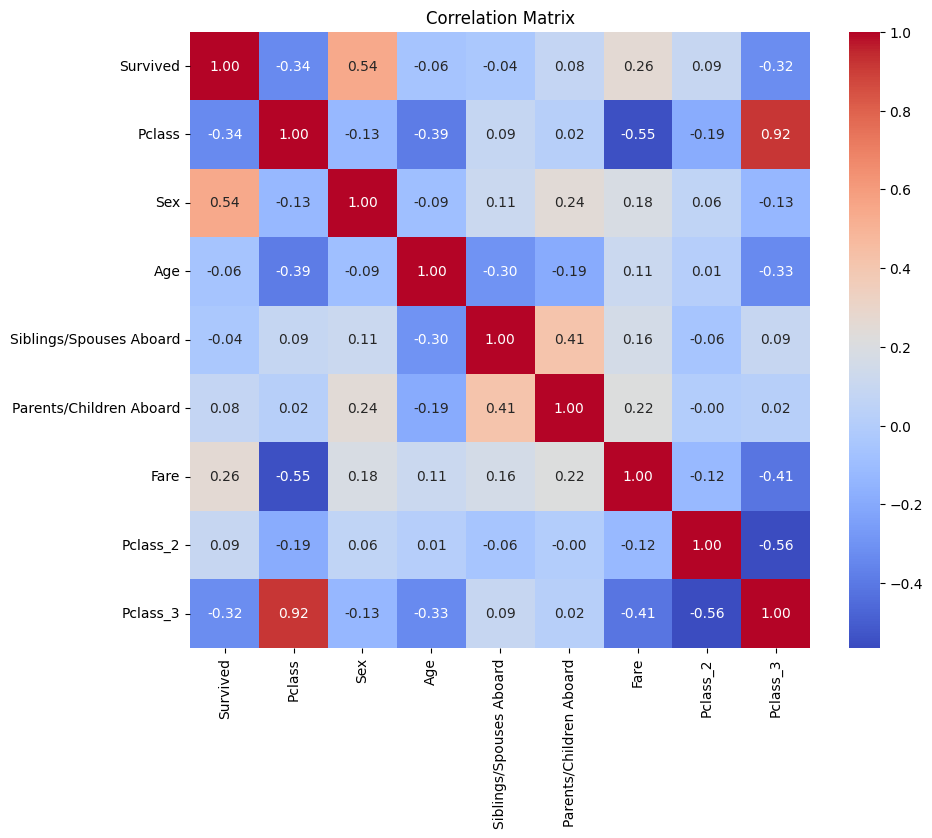

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()


# Optionally, you can visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Understanding Correlation Coefficients:
Range of Values:
Correlation coefficients range from -1 to 1.

1 indicates a perfect positive correlation.

-1 indicates a perfect negative correlation.

0 indicates no correlation.

Strength of Correlation:

0.1 to 0.3 (or -0.1 to -0.3): Weak correlation.

0.3 to 0.5 (or -0.3 to -0.5): Moderate correlation.

0.5 to 1.0 (or -0.5 to -1.0): Strong correlation.

Key Correlations:

**Survived**:

Sex (0.542): There is a strong positive correlation between being female and survival. This suggests that females had a higher chance of survival compared to males.

Fare (0.256): There is a moderate positive correlation between fare and survival. Passengers who paid higher fares had a better chance of survival.

Pclass (-0.337): There is a moderate negative correlation between passenger class and survival. Passengers in higher classes (lower numerical value) had a better chance of survival.

**Pclass**:

Fare (-0.549): There is a strong negative correlation between passenger class and fare. Higher class passengers (lower numerical value) paid higher fares.

Age (-0.391): There is a moderate negative correlation between passenger class and age. Older passengers were more likely to be in higher classes.

**Sex**:

Parents/Children Aboard (0.244): There is a weak positive correlation between being female and having parents or children aboard.

**Age**:

Siblings/Spouses Aboard (-0.298): There is a moderate negative correlation between age and the number of siblings/spouses aboard. Younger passengers were more likely to have siblings or spouses aboard.

Parents/Children Aboard (-0.194): There is a weak negative correlation between age and the number of parents/children aboard. Younger passengers were more likely to have parents or children aboard.

**Fare**:

Pclass_3 (-0.412): There is a moderate negative correlation between fare and being in the third class. Passengers in the third class paid lower fares.

Pclass_2 (-0.120): There is a weak negative correlation between fare and being in the second class.

**Interpretation**:

Survival Factors: Gender and fare are significant factors in survival, with females and higher fare-paying passengers having better survival rates. This aligns with historical accounts of the Titanic disaster, where women and children were given priority in lifeboats.

Class and Fare: There is a clear distinction in fare prices across different classes, with higher classes paying more. This also reflects the socio-economic stratification of the passengers.

Age and Family: Younger passengers were more likely to travel with family members, either siblings/spouses or parents/children.

In [ ]:
df.describe()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass_2,Pclass_3
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000,887.000000,887.000000
mean,0.385569,2.305524,0.354002,29.471443,0.525366,0.383315,32.30542,0.207441,0.549042
std,0.487004,0.836662,0.478480,14.121908,1.104669,0.807466,49.78204,0.405703,0.497870
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.250000,0.000000,0.000000,7.92500,0.000000,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.45420,0.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.13750,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.32920,1.000000,1.000000


In [ ]:
def remove_outliers(df, threshold=3):
    """
    Remove outliers from a DataFrame using the standard deviation method.

    Parameters:
    df (pd.DataFrame): The DataFrame from which to remove outliers.
    threshold (float): The number of standard deviations to use as the cutoff for identifying outliers.

    Returns:
    pd.DataFrame: The DataFrame with outliers removed.
    """
    # Identify binary columns
    binary_cols = [col for col in df.columns if df[col].nunique() == 2]

    # Identify non-binary columns
    non_binary_cols = [col for col in df.columns if col not in binary_cols]

    # Remove outliers for non-binary columns
    for col in non_binary_cols:
        mean = df[col].mean()
        std_dev = df[col].std()
        df = df[(df[col] >= mean - threshold * std_dev) & (df[col] <= mean + threshold * std_dev)]

    return df

df = remove_outliers(df, threshold=3)
df.describe()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass_2,Pclass_3
count,821.000000,821.000000,821.000000,821.00000,821.000000,821.000000,821.000000,821.000000,821.000000
mean,0.389769,2.303289,0.342266,29.88084,0.349574,0.255786,25.968244,0.221681,0.540804
std,0.487995,0.828958,0.474757,13.66483,0.619473,0.565561,29.843263,0.415631,0.498636
min,0.000000,1.000000,0.000000,0.42000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.00000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,0.000000,3.000000,0.000000,28.00000,0.000000,0.000000,13.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,38.00000,1.000000,0.000000,27.720800,0.000000,1.000000
max,1.000000,3.000000,1.000000,71.00000,3.000000,2.000000,164.866700,1.000000,1.000000


In [ ]:
#Logistic Regression

In [ ]:
# Step 1: Train-Test Split
X = df.drop(columns=['Survived'])  # Features
y = df['Survived']                  # Target variable

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1502)

# Add a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)



In [ ]:
# Step 2: Fit Logistic Regression Model
model = sm.Logit(y_train, X_train_sm).fit()


# Print the summary of the model
print(model.summary())




Optimization terminated successfully.
         Current function value: 0.447951
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  656
Model:                          Logit   Df Residuals:                      647
Method:                           MLE   Df Model:                            8
Date:                Sat, 28 Sep 2024   Pseudo R-squ.:                  0.3360
Time:                        03:27:30   Log-Likelihood:                -293.86
converged:                       True   LL-Null:                       -442.53
Covariance Type:            nonrobust   LLR p-value:                 1.513e-59
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.4136        nan        nan        nan         nan  

In [ ]:
# Step 3: Make Predictions
y_pred_prob = model.predict(X_test_sm)  # Predicted probabilities
y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Convert probabilities to binary outcome



In [ ]:
def interpret_logistic_regression(model):
    """
    Interpret the coefficients of a statsmodels logistic regression model.

    Parameters:
    model (statsmodels LogitResults): The fitted logistic regression model.

    Returns:
    None
    """
    params = model.params
    pvalues = model.pvalues
    conf = model.conf_int()
    conf['OR'] = params
    conf.columns = ['2.5%', '97.5%', 'OR']

    # Detect binary variables
    binary_vars = [var for var in model.model.exog_names if len(np.unique(model.model.data.orig_endog)) == 2]

    for var in params.index:
        coef = params[var]
        pval = pvalues[var]
        lower, upper = conf.loc[var, '2.5%'], conf.loc[var, '97.5%']

        if var in binary_vars:
            interpretation = f"For binary variable '{var}', the odds of the outcome being 1 are {'increased' if coef > 0 else 'decreased'} by a factor of {round(np.exp(coef), 2)} when the variable is 1 compared to 0."
        else:
            interpretation = f"For continuous variable '{var}', each one-unit increase in '{var}' {'increases' if coef > 0 else 'decreases'} the odds of the outcome being 1 by a factor of {round(np.exp(coef), 2)}."

        significance = "statistically significant" if pval < 0.05 else "not statistically significant"

        print(f"Variable: {var}")
        print(f"  Coefficient: {coef:.4f}")
        print(f"  95% CI: [{lower:.4f}, {upper:.4f}]")
        print(f"  Interpretation: {interpretation}")
        print(f"  This variable is {significance} (p-value: {pval:.4f}).\n")

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

def evaluate_classification_model(y_test, y_pred):
    """
    Evaluates a classification model by computing the accuracy, F1-score, sensitivity, and specificity.

    Parameters:
    y_true : array-like
        True labels of the samples.
    y_pred : array-like
        Predicted labels of the samples.

    Example usage:
        y_true = [1, 0, 1, 1, 0]
        y_pred = [1, 0, 0, 1, 1]
        evaluate_classification_model(y_true, y_pred)
    """

    # Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:")
    print("  - Measures the proportion of correctly classified instances out of the total instances.")
    print(f"  - Result: {accuracy:.2f}\n")

    # F1-Score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:")
    print("  - Harmonic mean of precision and recall, balances both false positives and false negatives.")
    print(f"  - Result: {f1:.2f}\n")

    # Sensitivity (Recall)
    sensitivity = tp / (tp + fn)
    print("Sensitivity (Recall):")
    print("  - Measures the proportion of actual positives that are correctly identified as such.")
    print(f"  - Result: {sensitivity:.2f}\n")

    # Specificity
    specificity = tn / (tn + fp)
    print("Specificity:")
    print("  - Measures the proportion of actual negatives that are correctly identified as such.")
    print(f"  - Result: {specificity:.2f}\n")

In [ ]:
#Apply functions

interpret_logistic_regression(model)


Variable: const
  Coefficient: 1.4136
  95% CI: [nan, nan]
  Interpretation: For binary variable 'const', the odds of the outcome being 1 are increased by a factor of 4.11 when the variable is 1 compared to 0.
  This variable is not statistically significant (p-value: nan).

Variable: Pclass
  Coefficient: -0.5370
  95% CI: [nan, nan]
  Interpretation: For binary variable 'Pclass', the odds of the outcome being 1 are decreased by a factor of 0.58 when the variable is 1 compared to 0.
  This variable is not statistically significant (p-value: nan).

Variable: Sex
  Coefficient: 2.7087
  95% CI: [2.2553, 3.1621]
  Interpretation: For binary variable 'Sex', the odds of the outcome being 1 are increased by a factor of 15.01 when the variable is 1 compared to 0.
  This variable is statistically significant (p-value: 0.0000).

Variable: Age
  Coefficient: -0.0387
  95% CI: [-0.0571, -0.0203]
  Interpretation: For binary variable 'Age', the odds of the outcome being 1 are decreased by a facto

In [ ]:
#Accuracy assessment

evaluate_classification_model(y_test, y_pred)

Accuracy:
  - Measures the proportion of correctly classified instances out of the total instances.
  - Result: 0.78

F1-Score:
  - Harmonic mean of precision and recall, balances both false positives and false negatives.
  - Result: 0.68

Sensitivity (Recall):
  - Measures the proportion of actual positives that are correctly identified as such.
  - Result: 0.71

Specificity:
  - Measures the proportion of actual negatives that are correctly identified as such.
  - Result: 0.82



In [ ]:
# Step 4: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Optionally visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()